# Title (Regression & Natural Language Processing using Linear Regression & K-Nearest Neighbors)

Task/Problem Statement: 
The goal of this assignment is to solve regression and classification problems using the
following models on two types of data: numeric and text.
- Part A: Numeric Data - Regression Problem – Linear Regression using the
Stochastic Gradient Descent algorithm
- Part B: Natural Language Processing - Text Data - Classification Problem – KNearest Neighbors

### Dataset
The energy efficiency dataset EnergyEfficiency.xlsx is created to perform energy analysis.

##### Description: 

The dataset comprises 768 samples and 8 features (X1 to X8). It has two real-valued
target variables (Y1 and Y2), i.e., heating load and cooling load, respectively.


###### Source:


##### Input variables:
- X1: Relative Compactness
- X2: Surface Area
- X3: Wall Area
- X4: Roof Area
- X5: Overall Height
- X6: Orientation
- X7: Glazing Area
- X8: Glazing Area Distribution


##### Output variable: 
- Y2: Cooling Load
or - Y1: Heating Load




In [2]:
# Import python modules

import warnings
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

## Load Data & Display Dataset Information

In [3]:
df = pd.read_excel('/Users/adars/Documents/ML\Assign 2/Dataset-Assignment2/EnergyEfficiency.xlsx')

#First five rows
df[0:4]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33


## Data Pre-processing


In [24]:
#Create a deep copy of the DataFrame object 
df_main = df.copy()
df_main

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Data Analysis

## Create Data Matrix X and Target y

In [25]:
#Convert the feature and target DataFrame objects into NumPy arrays

# Create separate data frame objects for X (features) and y (target)

X = df_main.drop(columns='Y1') 
X = X.drop(columns='Y2') 
y = df_main['Y1'] 


X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array


print("Data Matrix (X) Shape: ", X.shape)
print("Label Array (y) Shape: ", y.shape)

print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (y) Type: ", y.dtype)




Data Matrix (X) Shape:  (768, 8)
Label Array (y) Shape:  (768,)

Data Matrix (X) Type:  float64
Label Array (y) Type:  float64


## Partition the Dataset into Train & Test Subsets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the Data

# Experiment 1

## Model Selection Using Pipeline Object

The Pipeline object will assemble several steps that can be cross-validated together while setting different parameters. More specifically it will perform the following three steps to create a SGD Polynomial Regression model.

Create polynomial features based on the degree of the polynomial
Standardize the augmented dataset
Create a SGD Regressor model, which will use the standardized data for training

In [26]:
%%time

warnings.filterwarnings('ignore')

# Create a Pipeline object
sgd_pipeline = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid = {'poly__degree': [1, 2, 3, 4, 5],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': [1, 0.7, 0.5, 0.2, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object and perform hyperparameter tuning
sgd = GridSearchCV(sgd_pipeline, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd.fit(X_train, y_train)

# Get the optimal hyperparameters
params_optimal_sgd = sgd.best_params_

print("Best Score (negative mean squared error): %f" % sgd.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd)
print("\n")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best Score (negative mean squared error): -5.932489
Optimal Hyperparameter Values:  {'poly__degree': 5, 'sgd__alpha': 0.0001, 'sgd__eta0': 0.001, 'sgd__l1_ratio': 0.7, 'sgd__max_iter': 500}


CPU times: total: 3.44 s
Wall time: 2min 4s


## Train a Model Using Optimal Hyperparameters

In [ ]:
%%time



## Evaluate the Model 

In [37]:
%%time
#We use the optimal model created above for its evaluation based on training and test data.
#There is no need to train the model again by using the optimal hyperparameters.


# Training data: Make prediction 
y_train_predicted_sgd = sgd.predict(X_train)

print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted_sgd))

# Training data: Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted_sgd))

# Test data: Make prediction 
y_test_predicted = sgd.predict(X_test)

print("\nTest: Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))

# Training data: Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test, y_test_predicted))



Train: Mean squared error: 4.92
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.95

Test: Mean squared error: 5.44
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.95
CPU times: total: 15.6 ms
Wall time: 19.9 ms


## Create a learning curve (negative MSE vs train/validation data)

No. of Original Features:  8
No. of Augmented Features:  3002


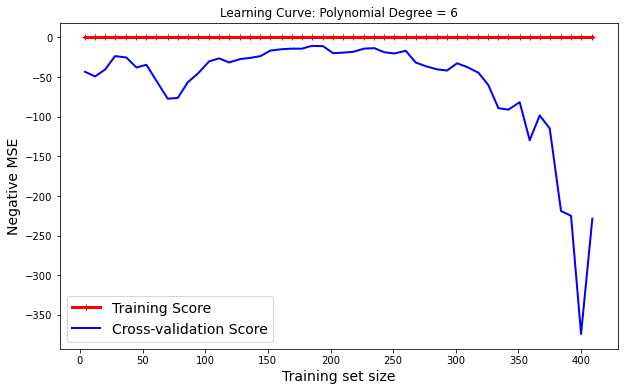

In [31]:
# Variable that speficies the degree of the polynomial to be added to the feature vector
poly_degree = 6


# Add polynomial and bias term with the feature vector using the sklearn PolynomialFeatures class
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

print("No. of Original Features: ", X_train.shape[1])
print("No. of Augmented Features: ", X_train_poly.shape[1])


scaler = StandardScaler().fit(X_train_poly)
X_train_poly_standardized = scaler.transform(X_train_poly)



train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X_train_poly_standardized, y_train, cv=3, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                                                                                                                                                                       
                                                        
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, "r-+", linewidth=3, label="Training Score")
plt.plot(train_sizes, val_mean, "b-", linewidth=2, label="Cross-validation Score")
plt.legend(loc="best", fontsize=14)   
plt.xlabel("Training set size", fontsize=14) 
plt.ylabel("Negative MSE", fontsize=14) 
plt.title("Learning Curve: Polynomial Degree = %d" % poly_degree)
plt.show()

# Experiment 2

In [33]:
df_main

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [34]:
#Calculate the standard correlation coefficient 
#(also called Pearson’s r) between the
#binary target Y and all features.

df_main.corr()['Y1'].sort_values(ascending=False)

Y1    1.000000
Y2    0.975862
X5    0.889430
X1    0.622272
X3    0.455671
X7    0.269842
X8    0.087368
X6   -0.002587
X2   -0.658120
X4   -0.861828
Name: Y1, dtype: float64

## Subset 1 

## Create Data Matrix X and Target y


In [41]:
x_data_subset_1 = df_main[['X1', 'X3', 'X5','X7']]
y_data_subset_1 = df_main['Y1']

print("Data frame X:")
print(x_data_subset_1)
print("\nData frame y:")
print(y_data_subset_1)


Xs1 = np.asarray(x_data_subset_1) # Data Matrix containing all features excluding the target
ys1 = np.asarray(y_data_subset_1) # 1D target array

print("X Data Shape: ", Xs1.shape)
print("y Data Shape: ", ys1.shape)

print("X Data Type: ", Xs1.dtype)
print("y Data Type: ", ys1.dtype)

Data frame X:
       X1     X3   X5   X7
0    0.98  294.0  7.0  0.0
1    0.98  294.0  7.0  0.0
2    0.98  294.0  7.0  0.0
3    0.98  294.0  7.0  0.0
4    0.90  318.5  7.0  0.0
..    ...    ...  ...  ...
763  0.64  343.0  3.5  0.4
764  0.62  367.5  3.5  0.4
765  0.62  367.5  3.5  0.4
766  0.62  367.5  3.5  0.4
767  0.62  367.5  3.5  0.4

[768 rows x 4 columns]

Data frame y:
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  float64


## Partition the Dataset into Train & Test Subsets

In [42]:
#Create Train and Test Dataset

X_train_subset_1, X_test_subset_1, y_train_subset_1, y_test_subset_1 = train_test_split(Xs1, ys1, test_size=0.2, random_state=42)

## Model Selection Using Pipeline Object for subset 1

In [39]:
%%time

warnings.filterwarnings('ignore')

# Create a Pipeline object
sgd_pipeline_s1 = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid_s1 = {'poly__degree': [1, 2, 3, 4, 5],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': [1, 0.7, 0.5, 0.2, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object and perform hyperparameter tuning
sgd_s1 = GridSearchCV(sgd_pipeline_s1, param_grid_s1, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd_s1.fit(X_train_subset_1, y_train_subset_1)

# Get the optimal hyperparameters
params_optimal_sgd_s1 = sgd_s1.best_params_

print("Best Score (negative mean squared error): %f" % sgd_s1.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd_s1)
print("\n")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best Score (negative mean squared error): -6.738496
Optimal Hyperparameter Values:  {'poly__degree': 5, 'sgd__alpha': 0.0001, 'sgd__eta0': 0.01, 'sgd__l1_ratio': 0.2, 'sgd__max_iter': 1000}


CPU times: total: 1.91 s
Wall time: 15.9 s


## Evaluate the Model 

In [44]:
%%time
#We use the optimal model created above for its evaluation based on training and test data.
#There is no need to train the model again by using the optimal hyperparameters.


# Training data: Make prediction 
y_train_predicted_sgd_s1 = sgd_s1.predict(X_train_subset_1)

print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train_subset_1, y_train_predicted_sgd_s1))

# Training data: Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train_subset_1, y_train_predicted_sgd_s1))

# Test data: Make prediction 
y_test_predicted_s1 = sgd_s1.predict(X_test_subset_1)

print("\nTest: Mean squared error: %.2f"
      % mean_squared_error(y_test_subset_1, y_test_predicted_s1))

# Training data: Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test_subset_1, y_test_predicted_s1))



Train: Mean squared error: 6.28
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.94

Test: Mean squared error: 7.21
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.93
CPU times: total: 31.2 ms
Wall time: 7 ms


# Subset 2

## Create Data Matrix X and Target y


In [45]:
x_data_subset_2 = df_main[['X1', 'X3', 'X4','X5']]
y_data_subset_2 = df_main['Y1']

print("Data frame X:")
print(x_data_subset_2)
print("\nData frame y:")
print(y_data_subset_2)


Xs2 = np.asarray(x_data_subset_2) # Data Matrix containing all features excluding the target
ys2 = np.asarray(y_data_subset_2) # 1D target array

print("X Data Shape: ", Xs2.shape)
print("y Data Shape: ", ys2.shape)

print("X Data Type: ", Xs2.dtype)
print("y Data Type: ", ys2.dtype)

Data frame X:
       X1     X3      X4   X5
0    0.98  294.0  110.25  7.0
1    0.98  294.0  110.25  7.0
2    0.98  294.0  110.25  7.0
3    0.98  294.0  110.25  7.0
4    0.90  318.5  122.50  7.0
..    ...    ...     ...  ...
763  0.64  343.0  220.50  3.5
764  0.62  367.5  220.50  3.5
765  0.62  367.5  220.50  3.5
766  0.62  367.5  220.50  3.5
767  0.62  367.5  220.50  3.5

[768 rows x 4 columns]

Data frame y:
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  float64


## Partition the Dataset into Train & Test Subsets

In [46]:
#Create Train and Test Dataset

X_train_subset_2, X_test_subset_2, y_train_subset_2, y_test_subset_2 = train_test_split(Xs2, ys2, test_size=0.2, random_state=42)

## Model Selection Using Pipeline Object for subset 2

In [51]:
%%time

warnings.filterwarnings('ignore')

# Create a Pipeline object
sgd_pipeline_s2 = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid_s2 = {'poly__degree': [1, 2, 3, 4, 5],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': [1, 0.7, 0.5, 0.2, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object and perform hyperparameter tuning
sgd_s2 = GridSearchCV(sgd_pipeline_s2, param_grid_s2, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd_s2.fit(X_train_subset_2, y_train_subset_2)

# Get the optimal hyperparameters
params_optimal_sgd_s2 = sgd_s2.best_params_

print("Best Score (negative mean squared error): %f" % sgd_s2.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd_s2)
print("\n")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best Score (negative mean squared error): -14.784740
Optimal Hyperparameter Values:  {'poly__degree': 5, 'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd__l1_ratio': 1, 'sgd__max_iter': 1000}


CPU times: total: 2 s
Wall time: 16.7 s


## Evaluate the Model 


In [48]:
%%time
#We use the optimal model created above for its evaluation based on training and test data.
#There is no need to train the model again by using the optimal hyperparameters.


# Training data: Make prediction 
y_train_predicted_sgd_s2 = sgd_s2.predict(X_train_subset_2)

print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train_subset_2, y_train_predicted_sgd_s2))

# Training data: Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train_subset_2, y_train_predicted_sgd_s2))

# Test data: Make prediction 
y_test_predicted_s2 = sgd_s2.predict(X_test_subset_2)

print("\nTest: Mean squared error: %.2f"
      % mean_squared_error(y_test_subset_2, y_test_predicted_s2))

# Training data: Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test_subset_2, y_test_predicted_s2))


Train: Mean squared error: 14.55
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.86

Test: Mean squared error: 14.12
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.86
CPU times: total: 93.8 ms
Wall time: 3.99 ms


# Subset 3

## Create Data Matrix X and Target y

In [49]:
x_data_subset_3 = df_main[['X1','X2', 'X3', 'X4','X5']]
y_data_subset_3 = df_main['Y1']

print("Data frame X:")
print(x_data_subset_3)
print("\nData frame y:")
print(y_data_subset_3)


Xs3 = np.asarray(x_data_subset_3) # Data Matrix containing all features excluding the target
ys3 = np.asarray(y_data_subset_3) # 1D target array

print("X Data Shape: ", Xs3.shape)
print("y Data Shape: ", ys3.shape)

print("X Data Type: ", Xs3.dtype)
print("y Data Type: ", ys3.dtype)

Data frame X:
       X1     X2     X3      X4   X5
0    0.98  514.5  294.0  110.25  7.0
1    0.98  514.5  294.0  110.25  7.0
2    0.98  514.5  294.0  110.25  7.0
3    0.98  514.5  294.0  110.25  7.0
4    0.90  563.5  318.5  122.50  7.0
..    ...    ...    ...     ...  ...
763  0.64  784.0  343.0  220.50  3.5
764  0.62  808.5  367.5  220.50  3.5
765  0.62  808.5  367.5  220.50  3.5
766  0.62  808.5  367.5  220.50  3.5
767  0.62  808.5  367.5  220.50  3.5

[768 rows x 5 columns]

Data frame y:
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64
X Data Shape:  (768, 5)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  float64


## Partition the Dataset into Train & Test Subsets

In [50]:
#Create Train and Test Dataset

X_train_subset_3, X_test_subset_3, y_train_subset_3, y_test_subset_3 = train_test_split(Xs3, ys3, test_size=0.2, random_state=42)

## Model Selection Using Pipeline Object for subset 3

In [52]:
%%time

warnings.filterwarnings('ignore')

# Create a Pipeline object
sgd_pipeline_s3 = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid_s3 = {'poly__degree': [1, 2, 3, 4, 5],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': [1, 0.7, 0.5, 0.2, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object and perform hyperparameter tuning
sgd_s3 = GridSearchCV(sgd_pipeline_s3, param_grid_s3, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd_s3.fit(X_train_subset_3, y_train_subset_3)

# Get the optimal hyperparameters
params_optimal_sgd_s3 = sgd_s3.best_params_

print("Best Score (negative mean squared error): %f" % sgd_s3.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd_s3)
print("\n")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best Score (negative mean squared error): -13.950223
Optimal Hyperparameter Values:  {'poly__degree': 5, 'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd__l1_ratio': 0, 'sgd__max_iter': 500}


CPU times: total: 2.08 s
Wall time: 20.4 s


# Evaluate Model

In [54]:
%%time
#We use the optimal model created above for its evaluation based on training and test data.
#There is no need to train the model again by using the optimal hyperparameters.


# Training data: Make prediction 
y_train_predicted_sgd_s3 = sgd_s3.predict(X_train_subset_3)

print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train_subset_3, y_train_predicted_sgd_s3))

# Training data: Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train_subset_3, y_train_predicted_sgd_s3))

# Test data: Make prediction 
y_test_predicted_s3 = sgd_s3.predict(X_test_subset_3)

print("\nTest: Mean squared error: %.2f"
      % mean_squared_error(y_test_subset_3, y_test_predicted_s3))

# Training data: Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test_subset_3, y_test_predicted_s3))


Train: Mean squared error: 13.92
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.86

Test: Mean squared error: 13.47
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.87
CPU times: total: 0 ns
Wall time: 5.49 ms


# Subset 4

## Create Data Matrix X and Target y

In [55]:
x_data_subset_4 = df_main[['X1','X2','X4','X5']]
y_data_subset_4 = df_main['Y1']

print("Data frame X:")
print(x_data_subset_4)
print("\nData frame y:")
print(y_data_subset_4)


Xs4 = np.asarray(x_data_subset_4) # Data Matrix containing all features excluding the target
ys4 = np.asarray(y_data_subset_4) # 1D target array

print("X Data Shape: ", Xs4.shape)
print("y Data Shape: ", ys4.shape)

print("X Data Type: ", Xs4.dtype)
print("y Data Type: ", ys4.dtype)

Data frame X:
       X1     X2      X4   X5
0    0.98  514.5  110.25  7.0
1    0.98  514.5  110.25  7.0
2    0.98  514.5  110.25  7.0
3    0.98  514.5  110.25  7.0
4    0.90  563.5  122.50  7.0
..    ...    ...     ...  ...
763  0.64  784.0  220.50  3.5
764  0.62  808.5  220.50  3.5
765  0.62  808.5  220.50  3.5
766  0.62  808.5  220.50  3.5
767  0.62  808.5  220.50  3.5

[768 rows x 4 columns]

Data frame y:
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64
X Data Shape:  (768, 4)
y Data Shape:  (768,)
X Data Type:  float64
y Data Type:  float64


## Partition the Dataset into Train & Test Subsets

In [56]:
#Create Train and Test Dataset

X_train_subset_4, X_test_subset_4, y_train_subset_4, y_test_subset_4 = train_test_split(Xs4, ys4, test_size=0.2, random_state=42)

## Model Selection Using Pipeline Object for subset 4

In [57]:
%%time

warnings.filterwarnings('ignore')

# Create a Pipeline object
sgd_pipeline_s4 = Pipeline([
        # Bias should be excluded because by default SGDRegressor adds bias via the"fit_intercept" parameter
        ('poly', PolynomialFeatures(include_bias=False)), 
        ('scaler', StandardScaler()),
        ('sgd', SGDRegressor(penalty='elasticnet')),
    ])

# Create a dictionary object with hyperparameters as keys and lists of corresponding values
param_grid_s4 = {'poly__degree': [1, 2, 3, 4, 5],
              'sgd__alpha': [0.1, 0.01, 0.001, 0.0001], 
              'sgd__l1_ratio': [1, 0.7, 0.5, 0.2, 0], 'sgd__max_iter':[500, 1000],
              'sgd__eta0': [0.01, 0.001, 0.0001]}

# Create a GridSearchCV object and perform hyperparameter tuning
sgd_s4 = GridSearchCV(sgd_pipeline_s4, param_grid_s4, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# The model is trained with optimal hyperparameters, thus its the optimal model
sgd_s4.fit(X_train_subset_4, y_train_subset_4)

# Get the optimal hyperparameters
params_optimal_sgd_s4 = sgd_s4.best_params_

print("Best Score (negative mean squared error): %f" % sgd_s4.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sgd_s4)
print("\n")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Best Score (negative mean squared error): -14.841619
Optimal Hyperparameter Values:  {'poly__degree': 5, 'sgd__alpha': 0.001, 'sgd__eta0': 0.01, 'sgd__l1_ratio': 0.7, 'sgd__max_iter': 1000}


CPU times: total: 1.95 s
Wall time: 16.1 s


In [58]:
%%time
#We use the optimal model created above for its evaluation based on training and test data.
#There is no need to train the model again by using the optimal hyperparameters.


# Training data: Make prediction 
y_train_predicted_sgd_s4 = sgd_s4.predict(X_train_subset_4)

print("Train: Mean squared error: %.2f"
      % mean_squared_error(y_train_subset_4, y_train_predicted_sgd_s4))

# Training data: Explained variance score: 1 is perfect prediction
print("Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train_subset_4, y_train_predicted_sgd_s4))

# Test data: Make prediction 
y_test_predicted_s4 = sgd_s4.predict(X_test_subset_4)

print("\nTest: Mean squared error: %.2f"
      % mean_squared_error(y_test_subset_4, y_test_predicted_s4))

# Training data: Explained variance score: 1 is perfect prediction
print("Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_test_subset_4, y_test_predicted_s4))


Train: Mean squared error: 17.55
Train: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.83

Test: Mean squared error: 17.11
Test: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.84
CPU times: total: 0 ns
Wall time: 7.98 ms


# Part B

In [78]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import classification_report


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Load Data

In [3]:
#Loading the CSV files

df_real = pd.read_csv('/Users/adars/Documents/ML/Assign 2/Dataset-Assignment2/NewsRealCOVID-19-05.csv', header=0)

df_fake = pd.read_csv('/Users/adars/Documents/ML/Assign 2/Dataset-Assignment2/NewsFakeCOVID-19-05.csv', header=0)


# Data Pre-processing


In [4]:
#label columns for each DataFrame object 0 for fake and 1 for real

df_real['label'] = 1
df_fake['label'] = 0

In [5]:
#Concatenate the two DataFrame objects vertically

df_all = pd.concat([df_real, df_fake], ignore_index=True)

In [6]:
df_all

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,label,archieve,news_url2,news_url3,news_url4,news_url5
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i...",1,NaN,NaN,NaN,NaN,NaN
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ...",1,NaN,NaN,NaN,NaN,NaN
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre...",1,NaN,NaN,NaN,NaN,NaN
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,...",1,NaN,NaN,NaN,NaN,NaN
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi...",1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,618,post,https://www.politifact.com/factchecks/2020/apr...,https://www.facebook.com/SenatorChrisLarson/po...,The April 22 jump in COVID-19 cases in the Uni...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2158,619,post,https://pesacheck.org/fact-check-are-hydroxych...,https://www.facebook.com/Reuben.Kutit/videos/v...,A video posted on Facebook claiming that chlor...,NaN,NaN,NaN,NaN,NaN,0,https://archive.today/EHBh2,NaN,NaN,NaN,NaN
2159,620,post,https://www.politifact.com/factchecks/2020/apr...,https://www.facebook.com/photo.php?fbid=281367...,"Trey Gowdy said, “I’m not saying COVID-19 isn’...",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2160,621,post,https://www.factcheck.org/2020/04/no-evidence-...,https://www.facebook.com/Education4Libs/photos...,A Pentagon study found that people who get the...,NaN,NaN,NaN,NaN,NaN,0,NaN,https://www.facebook.com/FollowTheWhiteRabbit1...,https://twitter.com/Education4Libs/status/1252...,NaN,NaN


In [7]:
#Extract only two columns
df_m = df_all[['content','label']]
df_m 

,content,label
0,experts warn most states that are reopening st...,1
1,a new study finds an increase in screen time d...,1
2,scientists around the world are working on a n...,1
3,coronaviruses cause respiratory illnesses so t...,1
4,medical experts are studying if remdesivir can...,1
...,...,...
2157,NaN,0
2158,NaN,0
2159,NaN,0
2160,NaN,0


# Exploratory Data Analysis (EDA)

## Quick Check of the Data

In [8]:
df_m.head()

,content,label
0,experts warn most states that are reopening st...,1
1,a new study finds an increase in screen time d...,1
2,scientists around the world are working on a n...,1
3,coronaviruses cause respiratory illnesses so t...,1
4,medical experts are studying if remdesivir can...,1


## Get Information on the Pandas DataFrame Object

In [9]:
#print information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1522 non-null   object
 1   label    2162 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.9+ KB


## Check if there are any null values in any columns

In [10]:
#Check if there are any null values in any columns
df_m.isna().values.any()

True

## Observation: NaN Values

In [11]:
#remove the rows containing NaN values using the following method.
df_m = df_m[df_m['content'].notna()]


## Dimension of the data

In [12]:
print("Dimension of the data: ", df_m.shape)

no_of_rows = df_m.shape[0]
no_of_columns = df_m.shape[1]

print("\nNo. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (1522, 2)

No. of Rows: 1522
No. of Columns: 2


## Class distribution

In [13]:
df_m.groupby('label').count()

,content
label,
0,125
1,1397


## Visualization of the Class Distribution

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


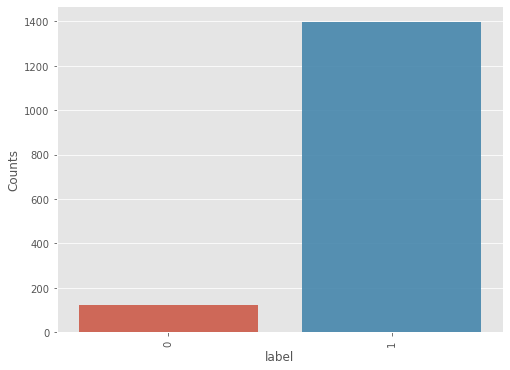

In [14]:
#Visualization of the Class Distribution

label_counts = df_m.label.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha=0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('label', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

## Correlation Between the news length & the Class 1 or 0 (Real news /fake news)

In [15]:
# Create a new column "length" the stores the length of the text on each row
df_m['length'] = df_m['content'].map(lambda text: len(text))

df_m.groupby('label').length.describe()

C:\Users\adars\AppData\Local\Temp\ipykernel_10164\3308828358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['length'] = df_m['content'].map(lambda text: len(text))


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,125.0,441.048000,124.378251,36.0,488.0,492.0,494.0,500.0
1,1397.0,473.110236,73.065309,64.0,489.0,492.0,495.0,502.0


## Visualize Length Distribution by Class

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

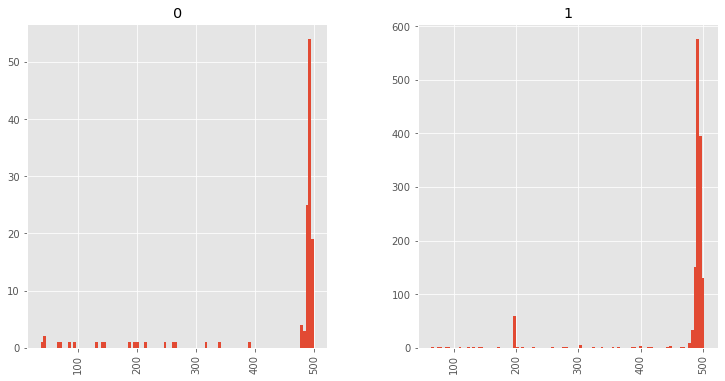

In [16]:
# Use a length threshold to visualize the distribution of length per class

threshold = 600
news_subset = df_m[df_m.length < threshold]
news_subset.hist(column='length', by='label', bins=100, figsize=(12, 6))

# Observation from the EDA
We observe that only 8.21% of news is fake.

# Text Normalization by Lemmatization

In [17]:
%%time
lemmatizer = WordNetLemmatizer()

df_m['text_lemmatized'] = df_m['content'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))

CPU times: total: 4.66 s
Wall time: 4.68 s


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Observe a Random Document Before and After Normalization

In [19]:
print("\nNews (no lemmatization):\n")
print(df_m['content'][369])
print("\nLemmatized News:\n")
print(df_m['text_lemmatized'][369])


News (no lemmatization):

researchers say that sars cov-2s rapid spread is likely due to the movements of people with no or very mild symptoms namely those who are unaware that they even have the virus. that is why social distancing is such an important containment measure they explain. the cdc recommend that all people wear cloth face masks in public places where it is difficult to maintain a 6-foot distance from others. this will help slow the spread of the virus from asymptomatic people or people who do not know. 

Lemmatized News:

researcher say that sars cov-2s rapid spread is likely due to the movement of people with no or very mild symptom namely those who are unaware that they even have the virus . that is why social distancing is such an important containment measure they explain . the cdc recommend that all people wear cloth face mask in public place where it is difficult to maintain a 6-foot distance from others . this will help slow the spread of the virus from asymptomat

# Create a Separate Feature Set (Data Matrix X) and Target (1D Array y)

In [20]:
X_b= df_m["text_lemmatized"] # DataFrame containing the target 
y_b= df_m['label'] # DataFrame containing the features excluding the target

'''
Convert X_b & y_b into Arrays
Use the NumPy asarray() method to convert the Pandas data frame object X_b and y_b into numpy arrays.
'''

X_b= np.asarray(X_b) # Data Matrix containing all features excluding the target
y_b = np.asarray(y_b) # 1D target array

print("Data Matrix (X) Shape: ", X_b.shape)
print("Label array (y) Shape: ", y_b.shape)

print("\nData Matrix (X) Type: ", X_b.dtype)
print("Label array (y) Type: ", y_b.dtype)

# Read a random "news" from X_b
print("\nA random email:\n")
print(X_b[7])

Data Matrix (X) Shape:  (1522,)
Label array (y) Shape:  (1522,)

Data Matrix (X) Type:  object
Label array (y) Type:  int64

A random email:

an early study indicated an antimalarial drug might be effective in treating covid-19 but expert say more research is needed and people should nt use off label medication on their own . kay nietfeld picture alliance via getty image all data and statistic are based on publicly available data at the time of publication . some information may be out of date . visit our coronavirus hub and follow our live update page for the most recent information on the covid-19 outbreak . when a study wa publ .


# Create Train and Test Dataset

In [21]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)


# Part B Experiment 3

# Use CountVectorizer() for Feature Vectorization :using binary features

In [22]:
%%time

'''
Create a count vectorizer object using one of the following two techniques
For each technique, the stop word removal attribute is activated (which can be removed if needed)
Use one of the techniques (comment out the other one)
'''

count_vect = CountVectorizer(binary=True, stop_words='english') # uses binary counts for vectorization

'''
Using the CountVectorizer object, create a matrix representation of the training documents
Each row represents a single document
Each column represents the binary count for each feature
'''
X_train_count_vectorized_features = count_vect.fit_transform(X_train_b).todense()

print("\nCount Vectorized Training Data Matrix Dimension: ", X_train_count_vectorized_features.shape)
print("\nSize of Vocabulary: ", len(count_vect.vocabulary_))


# Using the CountVectorizer object, create a matrix representation of the test documents
X_test_count_vectorized_features = count_vect.transform(X_test_b).todense()
print("\nCount Vectorized Test Data Matrix Dimension: ", X_test_count_vectorized_features.shape)


# Convert the feature matrices into numpy ndarrays
X_train_count_vectorized_features = np.asarray(X_train_count_vectorized_features) 
X_test_count_vectorized_features = np.asarray(X_test_count_vectorized_features) 


Count Vectorized Training Data Matrix Dimension:  (1217, 7219)

Size of Vocabulary:  7219

Count Vectorized Test Data Matrix Dimension:  (305, 7219)
CPU times: total: 203 ms
Wall time: 205 ms


## Scale the Features

In [23]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train_count_vectorized_features)

# Apply transform to both the training set and the test set
X_train_count_vectorized_features = scaler.transform(X_train_count_vectorized_features)
X_test_count_vectorized_features = scaler.transform(X_test_count_vectorized_features)

## Model Selection by Hyperparameter Tuning

In [25]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,10), 'p': [1, 2, 10,], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train_count_vectorized_features,y_train_b)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("\n")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.958728




In [26]:
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")


Optimal Hyperparameter Values:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}




## Train the Model

In [69]:
#use the optimal hyperparameter values to train a new model, as follows.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train_count_vectorized_features, y_train_b)



KNeighborsClassifier(weights='distance')

## Evaluate the Model on Test Data

In [70]:
y_train_predicted = knn.predict(X_train_count_vectorized_features)

train_accuracy_knn = np.mean(y_train_predicted == y_train_b)
print("\nExperiment 1 Training Accuracy: ", train_accuracy_knn)

# The accuracy of the model
y_test_predicted = knn.predict(X_test_count_vectorized_features)
test_accuracy_knn = knn.score(X_test_count_vectorized_features, y_test_b)
print("Experiment 1 Testng Accuracy: ", test_accuracy_knn)


target_names = ['class 0', 'class 1']
print(classification_report(y_test_b, y_test_predicted, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_b, y_test_predicted))



Experiment 1 Training Accuracy:  1.0
Experiment 1 Testng Accuracy:  0.9344262295081968
              precision    recall  f1-score   support

     class 0       0.83      0.21      0.33        24
     class 1       0.94      1.00      0.97       281

    accuracy                           0.93       305
   macro avg       0.88      0.60      0.65       305
weighted avg       0.93      0.93      0.92       305


Confusion Matrix (Test Data):
 [[  5  19]
 [  1 280]]


# Part B Experiment 4

# Use CountVectorizer() for Feature Vectorization using frequency of the feature

In [30]:
%%time

'''
Create a count vectorizer object using one of the following two techniques
For each technique, the stop word removal attribute is activated (which can be removed if needed)
Use one of the techniques (comment out the other one)
'''

count_vect_f = CountVectorizer(stop_words='english') # uses frequency counts for vectorization

'''
Using the CountVectorizer object, create a matrix representation of the training documents
Each row represents a single document
Each column represents the binary count for each feature
'''
X_train_count_vectorized_features_f = count_vect_f.fit_transform(X_train_b).todense()

print("\nCount Vectorized Training Data Matrix Dimension: ", X_train_count_vectorized_features_f.shape)
print("\nSize of Vocabulary: ", len(count_vect_f.vocabulary_))


# Using the CountVectorizer object, create a matrix representation of the test documents
X_test_count_vectorized_features_f = count_vect_f.transform(X_test_b).todense()
print("\nCount Vectorized Test Data Matrix Dimension: ", X_test_count_vectorized_features_f.shape)


# Convert the feature matrices into numpy ndarrays
X_train_count_vectorized_features_f = np.asarray(X_train_count_vectorized_features_f) 
X_test_count_vectorized_features_f = np.asarray(X_test_count_vectorized_features_f) 


Count Vectorized Training Data Matrix Dimension:  (1217, 7219)

Size of Vocabulary:  7219

Count Vectorized Test Data Matrix Dimension:  (305, 7219)
CPU times: total: 109 ms
Wall time: 109 ms


## Scale the Features

In [31]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train_count_vectorized_features_f)

# Apply transform to both the training set and the test set
X_train_count_vectorized_features_f = scaler.transform(X_train_count_vectorized_features_f)
X_test_count_vectorized_features_f = scaler.transform(X_test_count_vectorized_features_f)

## Model Selection by Hyperparameter Tuning

In [32]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid_f = {'n_neighbors': np.arange(1,10), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf_f = KNeighborsClassifier()

knn_cv_f = GridSearchCV(knn_clf_f, param_grid_f, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv_f.fit(X_train_count_vectorized_features_f,y_train_b)


params_optimal_knn_f = knn_cv_f.best_params_

print("Best Score: %f" % knn_cv_f.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_f)
print("\n")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.958315
Optimal Hyperparameter Values:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}




## Train the Model

In [74]:
#use the optimal hyperparameter values to train a new model, as follows.

knn_f = KNeighborsClassifier(**params_optimal_knn_f)

knn_f.fit(X_train_count_vectorized_features_f, y_train_b)



KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

## Evaluate the Model on Test Data

In [75]:
y_train_predicted_f = knn_f.predict(X_train_count_vectorized_features_f)

train_accuracy_knn_f = np.mean(y_train_predicted_f == y_train_b)
print("\nExperiment 4 Training Accuracy: ", train_accuracy_knn_f)

#The accuracy of the model
y_test_predicted_f = knn_f.predict(X_test_count_vectorized_features_f)
test_accuracy_knn_f = knn_f.score(X_test_count_vectorized_features_f, y_test_b)
print("Experiment 4 Testng Accuracy: ", test_accuracy_knn_f)

target_names_f = ['class 0', 'class 1']
print(classification_report(y_test_b, y_test_predicted_f, target_names=target_names))

#Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_b, y_test_predicted_f))



Experiment 4 Training Accuracy:  0.9991783073130649
Experiment 4 Testng Accuracy:  0.9377049180327869
              precision    recall  f1-score   support

     class 0       1.00      0.21      0.34        24
     class 1       0.94      1.00      0.97       281

    accuracy                           0.94       305
   macro avg       0.97      0.60      0.66       305
weighted avg       0.94      0.94      0.92       305


Confusion Matrix (Test Data):
 [[  5  19]
 [  0 281]]


# Part B Experiment 5

## Use TfidfVectorizer() for TF-IDF Feature Vectorization

In [35]:
%%time

# Create a TF-IDF vectorizer object 
# The stop word removal attribute is activated (which can be removed if needed)
tfidf_vect = TfidfVectorizer(stop_words='english')


# Using the TfidfVectorizer object, create a matrix representation of the training documents
# Each row represents a single document
# Each column represents the binary count for each feature
X_train_tfidf_vectorized_features = tfidf_vect.fit_transform(X_train_b).todense()

print("\nCount Vectorized Training Data Matrix (TF-IDF) Dimension: ", X_train_tfidf_vectorized_features.shape)
print("\nSize of Vocabulary: ", len(tfidf_vect.vocabulary_))


# Using the CountVectorizer object, create a matrix representation of the test documents
X_test_tfidf_vectorized_features = tfidf_vect.transform(X_test_b).todense()
print("\nCount Vectorized Test Data Matrix (TF-IDF) Dimension: ", X_test_tfidf_vectorized_features.shape)


# Convert the feature matrices into numpy ndarrays
X_train_tfidf_vectorized_features = np.asarray(X_train_tfidf_vectorized_features) 
X_test_tfidf_vectorized_features = np.asarray(X_test_tfidf_vectorized_features)


Count Vectorized Training Data Matrix (TF-IDF) Dimension:  (1217, 7219)

Size of Vocabulary:  7219

Count Vectorized Test Data Matrix (TF-IDF) Dimension:  (305, 7219)
CPU times: total: 109 ms
Wall time: 129 ms


## Scale the Features

In [37]:
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train_tfidf_vectorized_features)

# Apply transform to both the training set and the test set
X_train_tfidf_vectorized_features = scaler.transform(X_train_tfidf_vectorized_features)
X_test_tfidf_vectorized_features = scaler.transform(X_test_tfidf_vectorized_features)

## Model Selection by Hyperparameter Tuning

In [39]:
# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid_t = {'n_neighbors': np.arange(1,10), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf_t = KNeighborsClassifier()

knn_cv_t = GridSearchCV(knn_clf_t, param_grid_t, scoring='f1', cv=5, verbose=1, n_jobs=-1)
knn_cv_t.fit(X_train_tfidf_vectorized_features,y_train_b)

params_optimal_knn_t = knn_cv_t.best_params_

print("Best Score: %f" % knn_cv_t.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_t)
print("\n")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.959140
Optimal Hyperparameter Values:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}




## Train the Model

In [76]:
#use the optimal hyperparameter values to train a new model, as follows.

knn_t = KNeighborsClassifier(**params_optimal_knn_t)

knn_t.fit(X_train_tfidf_vectorized_features, y_train_b)



KNeighborsClassifier(n_neighbors=1)

## Evaluate the Model on Test Data

In [77]:
y_train_predicted_t = knn_t.predict(X_train_tfidf_vectorized_features)

train_accuracy_knn_t = np.mean(y_train_predicted_t == y_train_b)
print("\nExperiment 5 Training Accuracy: ", train_accuracy_knn_t)

#The accuracy of the model
y_test_predicted_t = knn_t.predict(X_test_tfidf_vectorized_features)
test_accuracy_knn_t = knn_t.score(X_test_tfidf_vectorized_features, y_test_b)
print("Experiment 5 Testng Accuracy: ", test_accuracy_knn_t)

target_names_t = ['class 0', 'class 1']
print(classification_report(y_test_b, y_test_predicted_t, target_names=target_names))

#Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_b, y_test_predicted_t))



Experiment 5 Training Accuracy:  1.0
Experiment 5 Testng Accuracy:  0.9377049180327869
              precision    recall  f1-score   support

     class 0       1.00      0.21      0.34        24
     class 1       0.94      1.00      0.97       281

    accuracy                           0.94       305
   macro avg       0.97      0.60      0.66       305
weighted avg       0.94      0.94      0.92       305


Confusion Matrix (Test Data):
 [[  5  19]
 [  0 281]]


# Experiment 6

# The Precision-Recall (PR) curve for the model chosen from experiment 4

Precisions:  [0.91700904 0.92072667 0.92066116 ... 0.98850575 0.98837209 1.        ]

Recalls:  [1.         0.99910394 0.99820789 ... 0.07706093 0.07616487 0.        ]

Thresholds:  [0.         0.53388582 0.56420257 ... 0.92352196 0.92856961 1.        ]


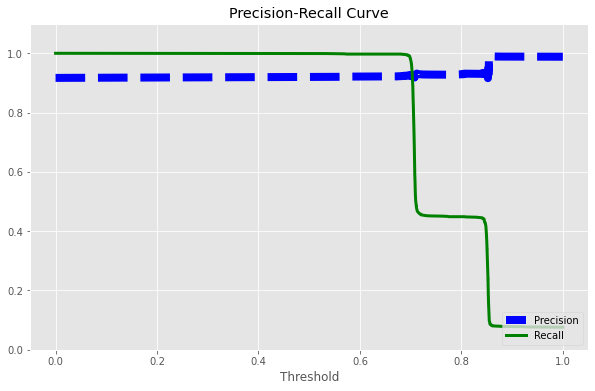

In [68]:
#The Precision-Recall (PR) curve 

# Technique 1
y_scores2 = cross_val_predict(knn_f, X_train_count_vectorized_features_f, y_train_b, method="predict_proba", cv=5)[:, 1]


precisions2, recalls2, thresholds2 = precision_recall_curve(y_train_b, y_scores2)

print("Precisions: ", precisions2)
print("\nRecalls: ", recalls2)
print("\nThresholds: ", thresholds2)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2): 
    plt.plot(thresholds2, precisions2[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds2, recalls2[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions2, recalls2, thresholds2)
plt.show()



### A threshold that increases the test recall for the misinformation class, but does not decrease the test precision much for the same class

In [67]:
print("Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold
# t = threshold_optimal # optimal threshold from precision-recall curve 

t = 0.69

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (cross_val_predict(knn_f, X_train_count_vectorized_features_f, y_train_b, method="predict_proba", cv=3)[:,1] > t).astype(int)

train_accuracy_knn_new = np.mean(y_train_predicted_new == y_train_b)

print("\nTraining Accuracy after using optimal threshold: ", train_accuracy_knn_new)

y_test_predicted_new = (knn_f.predict_proba(X_test_count_vectorized_features_f)[:,1] > t).astype(int)

test_accuracy_knn_new = np.mean(y_test_b == y_test_predicted_new)

print("\nTest Accuracy after using optimal threshold: ", test_accuracy_knn_new)


precision_test_new = precision_score(y_test_b, y_test_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision_test_new))

recall_new = recall_score(y_test_b, y_test_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall_new))


f1_new = f1_score(y_test_b, y_test_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1_new))

print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_test_b, y_test_predicted_new))

target_names_f = ['class 0', 'class 1']
print(classification_report(y_test_b, y_test_predicted_new, target_names=target_names))


Performance Measures Based on the Optimal Threshold (from Precision-Recall Curve):

Training Accuracy after using optimal threshold:  0.9219391947411668

Test Accuracy after using optimal threshold:  0.9475409836065574

Precision (Threshold 0.69) = 0.952218
Recall (Threshold 0.69) = 0.992883
F1 Score = (Threshold 0.69) = 0.972125
Confusion Matrix (Threshold 0.69)
[[ 10  14]
 [  2 279]]
              precision    recall  f1-score   support

     class 0       0.83      0.42      0.56        24
     class 1       0.95      0.99      0.97       281

    accuracy                           0.95       305
   macro avg       0.89      0.70      0.76       305
weighted avg       0.94      0.95      0.94       305

